In [2]:
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2516, done.
remote: Total 2516 (delta 0), reused 0 (delta 0), pack-reused 2516 (from 1)
Receiving objects: 100% (2516/2516), 8.20 MiB | 17.00 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.


In [4]:
%cd pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 56.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.4-py3-none-any.whl size=1408196 sha256=6ecca5802c5fd56eb170d5c0f3876e8931f3d01da3f580ec47815645e3996e4d
  Stored in directory: /root/.cache/pip/wheels/42/29/49/5bed207bac4578e4d2c0c5fc0226bfd33a7e2953ea56356855
Successfully built visdom


## Carregar modelo pré treinado
> Link com os modelos: http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/

Modelos disponíveis: `edges2shoes` (desenhos->sapatos), `sat2map` (satélite->mapa), `map2sat` (mapa->satélite), `facades_label2photo` (label de fachadas ->fotos de fachadas), `day2night` (dia->noite) e `edges2handbags` (desenhos->bolsas)

In [6]:
nome_modelo = 'facades_label2photo'
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)

In [7]:
!mkdir -p {diretorio_modelo}

In [8]:
url = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(nome_modelo)

In [10]:
!wget -N {url}

--2025-01-13 17:29:12--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/facades_label2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704720 (208M)
Saving to: ‘facades_label2photo.pth’

facades_label2photo 100%[===================>] 207.62M  15.8MB/s    in 17s     

2025-01-13 17:29:29 (12.1 MB/s) - ‘facades_label2photo.pth’ saved [217704720/217704720]



In [11]:
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

## Download do dataset

In [14]:
df = 'facades'
arq_df = "{}.tar.gz".format(df)
url_df = "http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{}".format(arq_df)
url_df

'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz'

In [15]:
!wget -N {url_df}

--2025-01-13 17:33:10--  http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/facades.tar.gz
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30168306 (29M) [application/x-gzip]
Saving to: ‘facades.tar.gz’

facades.tar.gz      100%[===================>]  28.77M   680KB/s    in 71s     

2025-01-13 17:34:21 (417 KB/s) - ‘facades.tar.gz’ saved [30168306/30168306]



In [16]:
!tar -zxvf {arq_df} -C ./datasets/

facades/
facades/test/
facades/test/27.jpg
facades/test/5.jpg
facades/test/72.jpg
facades/test/1.jpg
facades/test/10.jpg
facades/test/100.jpg
facades/test/101.jpg
facades/test/102.jpg
facades/test/103.jpg
facades/test/104.jpg
facades/test/105.jpg
facades/test/106.jpg
facades/test/11.jpg
facades/test/12.jpg
facades/test/13.jpg
facades/test/14.jpg
facades/test/15.jpg
facades/test/16.jpg
facades/test/17.jpg
facades/test/18.jpg
facades/test/19.jpg
facades/test/2.jpg
facades/test/20.jpg
facades/test/21.jpg
facades/test/22.jpg
facades/test/23.jpg
facades/test/24.jpg
facades/test/25.jpg
facades/test/26.jpg
facades/test/50.jpg
facades/test/51.jpg
facades/test/52.jpg
facades/test/53.jpg
facades/test/54.jpg
facades/test/55.jpg
facades/test/56.jpg
facades/test/57.jpg
facades/test/58.jpg
facades/test/59.jpg
facades/test/6.jpg
facades/test/60.jpg
facades/test/61.jpg
facades/test/62.jpg
facades/test/63.jpg
facades/test/64.jpg
facades/test/65.jpg
facades/test/66.jpg
facades/test/67.jpg
facades/test/6

In [17]:
!python test.py --dataroot ./datasets/{df} --direction BtoA --model pix2pix --name {nome_modelo}_pretreinado

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/facades            	[default: None]
             dataset_mode: aligned                       
                direction: BtoA                          	[default: AtoB]
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0            

In [18]:
diretorio_resultados = "./results/{}_pretreinado/test_latest/images/".format(nome_modelo)

### Imagem gerada pelo modelo

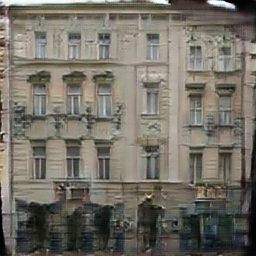

In [19]:
img_resultado = cv2.imread(diretorio_resultados + "100_fake_B.png")
cv2_imshow(img_resultado)

### Contorno

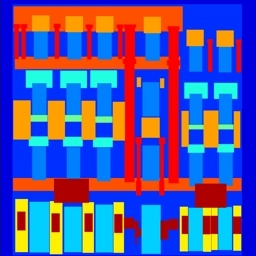

In [20]:
img_resultado = cv2.imread(diretorio_resultados + "100_real_A.png")
cv2_imshow(img_resultado)

### Imagem real

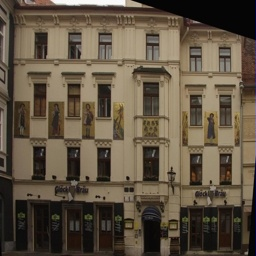

In [21]:
img_resultado = cv2.imread(diretorio_resultados + "100_real_B.png")
cv2_imshow(img_resultado)

# Modelo Desenho para foto

In [22]:
nome_modelo = 'edges2shoes'
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
!mkdir -p {diretorio_modelo}

In [23]:
url_modelo = 'http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth'.format(nome_modelo)
!wget -N {url_modelo}

--2025-01-13 17:44:51--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘edges2shoes.pth’

edges2shoes.pth     100%[===================>] 207.62M  14.7MB/s    in 15s     

2025-01-13 17:45:07 (13.6 MB/s) - ‘edges2shoes.pth’ saved [217704688/217704688]



In [24]:
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

## Testando com imagens

In [25]:
!mkdir -p imagens/test/

In [27]:
!cp -r /content/desenho_sapato01.jpg imagens/test/
!cp -r /content/desenho_sapato01_v2.jpg imagens/test/
!cp -r /content/desenho_sapato01_v3.jpg imagens/test/
!cp -r /content/desenho_sapato02.jpg imagens/test/
!cp -r /content/desenho_sapato02_v2.jpg imagens/test/
!cp -r /content/desenho_sapato02_v3.jpg imagens/test/

In [28]:
!python test.py --dataroot ./imagens --name {nome_modelo}_pretreinado --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./imagens                     	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

Parâmetros:

* ` --dataset_mode single` - define o modo como `single` o que significa que serão imagens únicas

* `--model test` - antes o valor de `--model` era pix2pix (pois seu algoritmo é preparado para trabalhar com os datasets pareados) mas agora como estamos lidando com imagem única vamos deixar como `test`, que ainda assim irá ser Pix2Pix mas agora estamos dizendo que não queremos que ele faça o processo que fez quando era imagem em par.

* `--netG unet_256` - especifica a rede do gerador. Antes não precisávamos dizer, mas agora que fizemos tal ajuste a gente precisa dessa alteração para indicar explicitamente que vamos usar essa arquitetura padrão.

* `--norm batch` - o mesmo caso do acima, precisamos agora passar esse parâmetro mesmo já sendo o valor "padrão".


## Exibindo resultados

In [29]:
diretorio_resultados = "./results/{}_pretreinado/test_latest/images/".format(nome_modelo)

In [34]:
def exibir_resultados(nome_img, diretorio):
  img_entrada = cv2.imread(diretorio + nome_img + "_real.png")
  img_resultado = cv2.imread(diretorio + nome_img + "_fake.png")
  imgs = [img_entrada, img_resultado]
  titulo = ['Desenho (entrada)', 'Imagem Gerada']
  for i in range(len(imgs)):
    plt.subplot(1,2, i + 1)
    plt.title(titulo[i])
    plt.axis('off')
    plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB))
  plt.show()

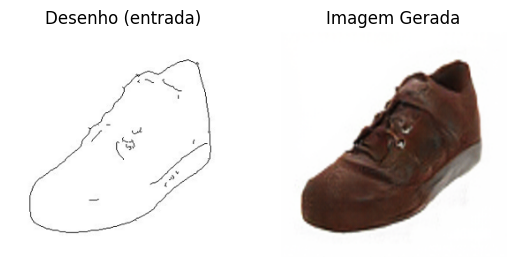

In [35]:
img = 'desenho_sapato01'
exibir_resultados(img, diretorio_resultados)

In [36]:
dir_imgs = 'imagens/test'
lista_imgs = [os.path.splitext(f)[0] for f in os.listdir(dir_imgs) if f.endswith(".jpg")]
lista_imgs

['desenho_sapato01_v2',
 'desenho_sapato01',
 'desenho_sapato02_v2',
 'desenho_sapato02',
 'desenho_sapato01_v3',
 'desenho_sapato02_v3']


Resultado para a imagem desenho_sapato01_v2


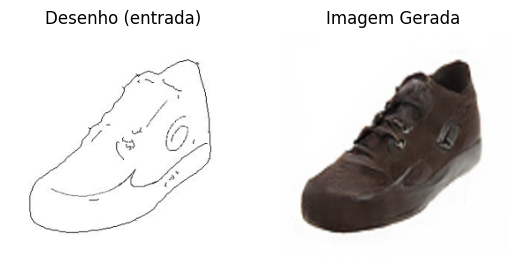


Resultado para a imagem desenho_sapato01


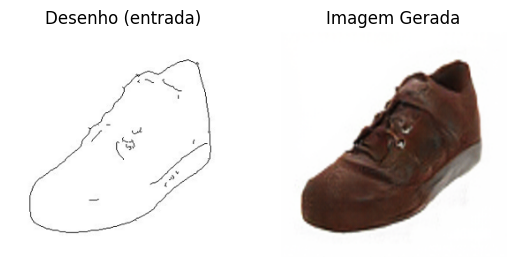


Resultado para a imagem desenho_sapato02_v2


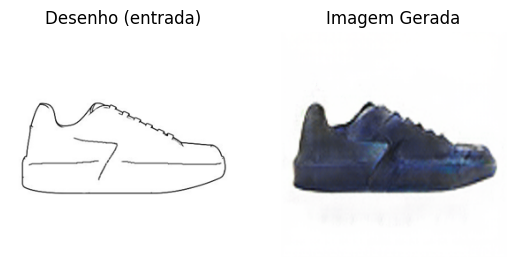


Resultado para a imagem desenho_sapato02


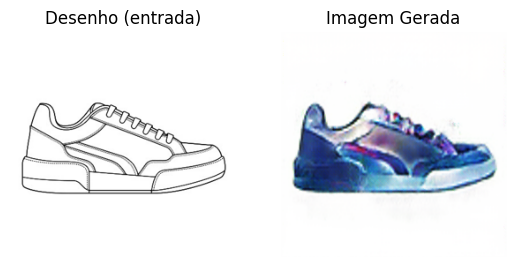


Resultado para a imagem desenho_sapato01_v3


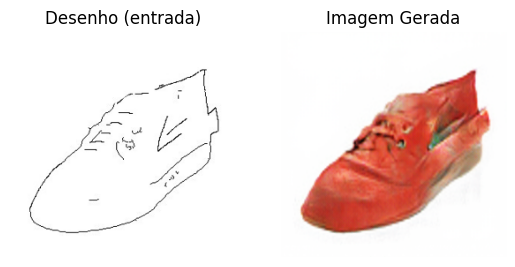


Resultado para a imagem desenho_sapato02_v3


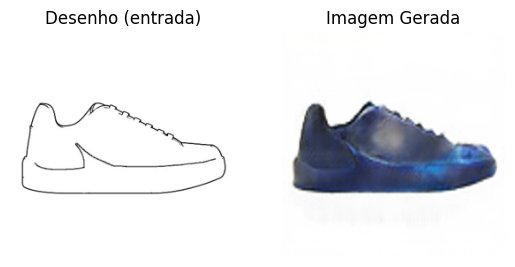

In [37]:
for img in lista_imgs:
  print('\nResultado para a imagem {}'.format(img))
  exibir_resultados(img, diretorio_resultados)

# Dia para noite

In [39]:
nome_modelo = 'day2night'
diretorio_modelo = "./checkpoints/{}_pretreinado/".format(nome_modelo)
!mkdir -p {diretorio_modelo}

In [40]:
url_modelo = "http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/{}.pth".format(nome_modelo)
!wget -N {url_modelo}

--2025-01-13 18:08:03--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘day2night.pth’

day2night.pth       100%[===================>] 207.62M  12.3MB/s    in 23s     

2025-01-13 18:08:26 (8.93 MB/s) - ‘day2night.pth’ saved [217710797/217710797]



In [41]:
!mv {nome_modelo}.pth {diretorio_modelo}latest_net_G.pth

## Resultados

In [44]:
!python test.py --dataroot /content/teste --name {nome_modelo}_pretreinado --model test --dataset_mode single --netG unet_256 --norm batch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /content/teste                	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            